In [34]:
import autogen

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": "gpt-3.5-turbo"
    },
)
llm_config={
        "request_timeout": 600,
        "seed": 42,                  # seed for caching and reproducibility
        "config_list": config_list,  # a list of OpenAI API configurations
        "temperature": 0,            # temperature for sampling
    }

## Checking Stock Price Change

In the example below, two agents in AutoGen to write a python script and execute the script. 
This process involves constructing a `AssistantAgent` to serve as the assistant, along with a `UserProxyAgent` that acts as a proxy for the human user. In this example demonstrated below, when constructing the `UserProxyAgent`,  we select the `human_input_mode` to "NEVER". This means that the `UserProxyAgent` will not solicit feedback from the human user. It stops replying when the limit defined by `max_consecutive_auto_reply` is reached, or when `is_termination_msg()` returns true for the received message.

In [35]:
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
)
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,  # set to True or image name like "python:3" to use docker
    },
)

In [11]:
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="""What date is today? Compare the year-to-date gain for META and TESLA.""",
)

user_proxy (to assistant):

What date is today? Compare the year-to-date gain for META and TESLA.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To get the current date, you can use the `datetime` module in Python. Here's the code to get the current date:

```python
import datetime

current_date = datetime.date.today()
print(current_date)
```

To compare the year-to-date gain for META and TESLA, we need to know the stock prices for both companies at the beginning of the year and the current stock prices. Could you please provide the stock prices for META and TESLA at the beginning of the year and the current stock prices?

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...


SIGALRM is not supported on Windows. No timeout will be enforced.


user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
2023-11-05


--------------------------------------------------------------------------------
assistant (to user_proxy):

Thank you for providing the current date. However, I still need the stock prices for META and TESLA at the beginning of the year and the current stock prices in order to compare the year-to-date gain. Could you please provide those details?

--------------------------------------------------------------------------------
user_proxy (to assistant):



--------------------------------------------------------------------------------
assistant (to user_proxy):

I apologize for the confusion. Since you haven't provided the stock prices for META and TESLA, I won't be able to compare their year-to-date gains. Is there anything else I can assist you with?

--------------------------------------------------------------------------------
user_proxy (to assistant):



----------------------------------

In [38]:
# followup of the previous question
user_proxy.initiate_chat(
    assistant,
    message="""Plot a chart of their stock price change YTD and save to stock_price_ytd.png.""",
)

user_proxy (to assistant):

Plot a chart of their stock price change YTD and save to stock_price_ytd.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of the stock price change YTD and save it as "stock_price_ytd.png", you can use the matplotlib library in Python. Here's an example code:

```python
# filename: plot_stock_price.py
import matplotlib.pyplot as plt

# Assuming you have the stock price data in a list or numpy array called 'stock_prices'
# and the corresponding dates in a list or numpy array called 'dates'

# Plotting the stock price change YTD
plt.plot(dates, stock_prices)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Change YTD')

# Saving the plot as an image
plt.savefig('stock_price_ytd.png')

# Displaying the plot
plt.show()
```

You will need to replace 'stock_prices' and 'dates' with your actual data. After saving the code in a file named "

SIGALRM is not supported on Windows. No timeout will be enforced.


user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "plot_stock_price.py", line 2, in <module>
    import matplotlib.pyplot as plt
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 272, in <module>
    _check_versions()
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\__init__.py", line 266, in _check_versions
    module = importlib.import_module(modname)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\

If set, it limits the response to that number of tokens. If not set, the limit is the model’s max capacity (4096 tokens for GPT-3.5 Turbo) minus the tokens used in the prompt. The max_tokens serves as a hard cap, truncating the response if the limit is reached.

In [25]:
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="""Write a poem about a cat.""",
)

user_proxy (to assistant):

Write a poem about a cat.

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure! Here's a poem about a cat:

In a world of whiskers and fur so fine,
There lived a cat, both sleek and divine.
With eyes like emeralds, shining bright,
She prowled through the day and ruled the night.

Her graceful movements, a dance in the air,
As she leapt and bounded without a care.
Her purrs like music, a soothing sound,
Bringing comfort and joy all around.

With paws so soft, she'd gently tread,
Exploring the world, both far and spread.
From rooftops high to gardens below,
She'd roam freely, her spirit aglow.

Her coat, a tapestry of colors so grand,
A masterpiece painted by nature's hand.
From ebony black to snowy white,
She was a vision, a true delight.

She'd curl up by the fire, so warm and snug,
Dreaming of adventures, chasing bugs.
And when the moon rose, casting its glow,
She'd venture out, her secrets to be

In [29]:
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="What are the things we required to start a software house. ",
)

user_proxy (to assistant):

What are the things we required to start a software house. 

--------------------------------------------------------------------------------


assistant (to user_proxy):

To start a software house, you will need the following:

1. Business Plan: Create a detailed business plan outlining your goals, target market, services, pricing, marketing strategy, and financial projections.

2. Legal Requirements: Register your business and obtain the necessary licenses and permits. Consult with a lawyer to ensure compliance with local laws and regulations.

3. Office Space: Find a suitable office space to accommodate your team and clients. Consider factors such as location, size, amenities, and lease terms.

4. Equipment and Infrastructure: Purchase or lease the necessary equipment and infrastructure, including computers, servers, networking devices, software licenses, and office furniture.

5. Team: Assemble a skilled and experienced team of software developers, designers, project managers, and other professionals. Conduct interviews and hire individuals who align with your company's vision and values.

6. Project Management Tools: Impl

user_proxy (to assistant):

What are the websites that offer free domain and services. And you have to write the code?

--------------------------------------------------------------------------------
assistant (to user_proxy):

To find websites that offer free domain and services, we can search the web using a search engine. Here's an example of Python code that uses the `requests` library to search for websites that offer free domain and services:

```python
import requests

def search_free_domain_websites():
    search_query = "websites that offer free domain and services"
    url = f"https://www.google.com/search?q={search_query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    # Extract the search results from the response
    search_results = response.text

    # Print the search res

SIGALRM is not supported on Windows. No timeout will be enforced.


user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
<!doctype html><html lang="en-PK"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>websites that offer free domain and services - Google Search</title><script nonce="Q8PKJOIts2TOUV3z1-tqrQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationSt
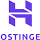
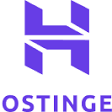

InvalidRequestError: This model's maximum context length is 4097 tokens. However, your messages resulted in 49271 tokens. Please reduce the length of the messages.

In [30]:
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="What are the websites that offer free domain and services. And you have to write the code?",
)

In [31]:
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="Create the portfolio website n which I have different pages and videos and images",
)

user_proxy (to assistant):

Create the portfolio website n which I have different pages and videos and images

--------------------------------------------------------------------------------
assistant (to user_proxy):

To create a portfolio website with different pages, videos, and images, you can use HTML, CSS, and JavaScript. Here's a step-by-step plan to get you started:

1. Create a new folder for your project and navigate to it in the terminal or command prompt.

2. Create an HTML file for each page of your portfolio. You can use a text editor like Visual Studio Code or Sublime Text to create and edit the files. For example, you can create an "index.html" file for the homepage, a "videos.html" file for the videos page, and an "images.html" file for the images page.

3. In each HTML file, add the necessary HTML structure, including the `<head>` section and the `<body>` section. You can also link an external CSS file to style your pages.

4. Add content to each HTML file, such as h

Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)

In [32]:
dir(llm_config)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']